In [1]:
import pandas as pd
import numpy as np

df = pd.read_csv("C:/Users/User/Desktop/cdac advance modules/pml lecture/class  practice/program_dataset/Sonar.csv")

In [2]:
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V52,V53,V54,V55,V56,V57,V58,V59,V60,Class
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [3]:
df['Class'].unique()

array(['R', 'M'], dtype=object)

In [4]:
dum_df = pd.get_dummies(df, drop_first=True)

In [5]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [6]:
X = dum_df.iloc[:,0:-1]
y = dum_df.iloc[:,-1]

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=42,
                                                    stratify=y)

In [7]:
clf = DecisionTreeClassifier(random_state=2021)
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

[[27  7]
 [14 15]]
              precision    recall  f1-score   support

           0       0.66      0.79      0.72        34
           1       0.68      0.52      0.59        29

    accuracy                           0.67        63
   macro avg       0.67      0.66      0.65        63
weighted avg       0.67      0.67      0.66        63

0.6666666666666666


In [11]:
import graphviz 

from sklearn import tree
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['R', 'M'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

In [17]:
depth_range = [3,4,5,6,7,8,9]
minsplit_range = [5,10,15,20,25,30]
minleaf_range = [5,10,15]

parameters = dict(max_depth=depth_range,
                  min_samples_split=minsplit_range, 
                  min_samples_leaf=minleaf_range)

from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state=2018)


from sklearn.model_selection import StratifiedKFold
kfold = StratifiedKFold(n_splits=5, random_state=2020,shuffle=True)

cv = GridSearchCV(clf, param_grid=parameters,
                  cv=kfold,scoring='roc_auc')

cv.fit(X,y)
# Best Parameters
print(cv.best_params_)

print(cv.best_score_)

best_model = cv.best_estimator_
from sklearn import tree
dot_data = tree.export_graphviz(best_model, out_file=None, 
                         feature_names=X_train.columns,  
                         class_names=['R', 'M'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

{'max_depth': 4, 'min_samples_leaf': 10, 'min_samples_split': 5}
0.80486738090285


ExecutableNotFound: failed to execute 'dot', make sure the Graphviz executables are on your systems' PATH

ValueError: shape mismatch: objects cannot be broadcast to a single shape

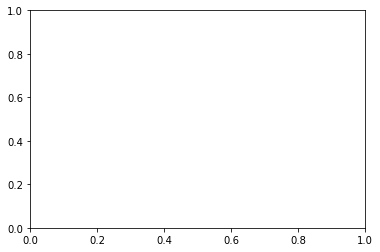

In [14]:
import matplotlib.pyplot as plt

best_model.feature_importances_

ind = np.arange(4)
plt.bar(ind,best_model.feature_importances_)
plt.xticks(ind,(X.columns))
plt.title('Feature Importance')
plt.xlabel("Variables")
plt.show()